In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline

In [29]:
data = pd.read_csv("/kaggle/input/analysis/Unemployment in India (1).csv")
print(data.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [30]:
data.columns= ["Region","Date","Frequency",
               "Estimated Unemployment Rate(%)",
               "Estimated Employed",
               "Estimated Labour Participation Rate(%)",
               "Area"]

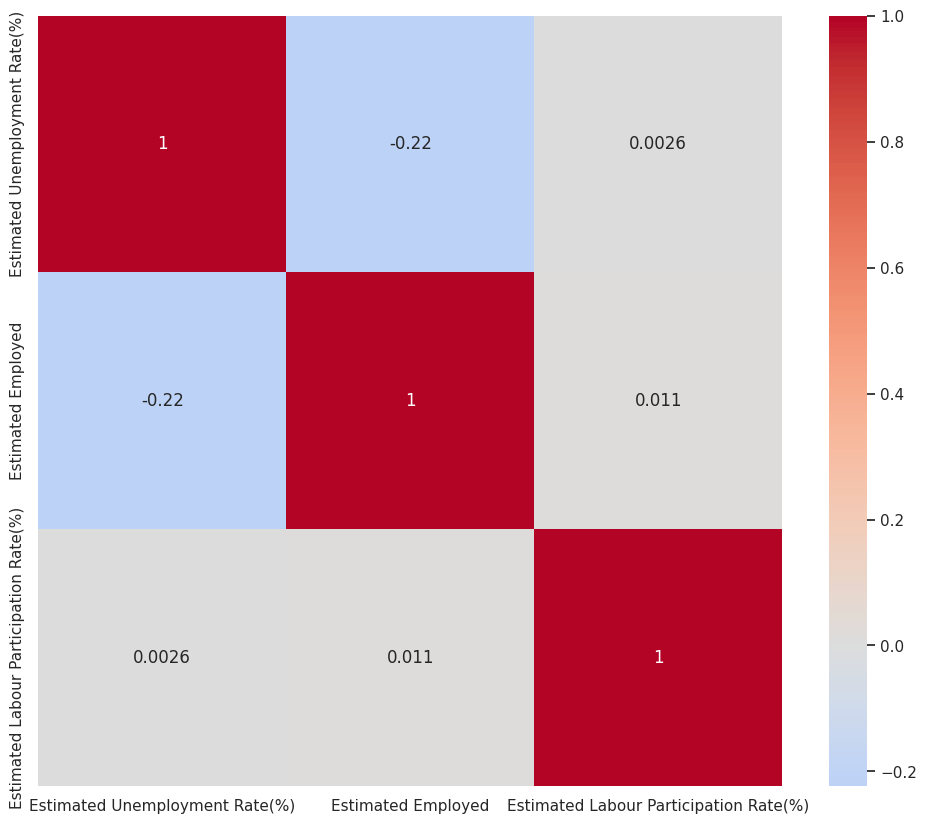

In [31]:
numeric_data = data.select_dtypes(include=['number'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

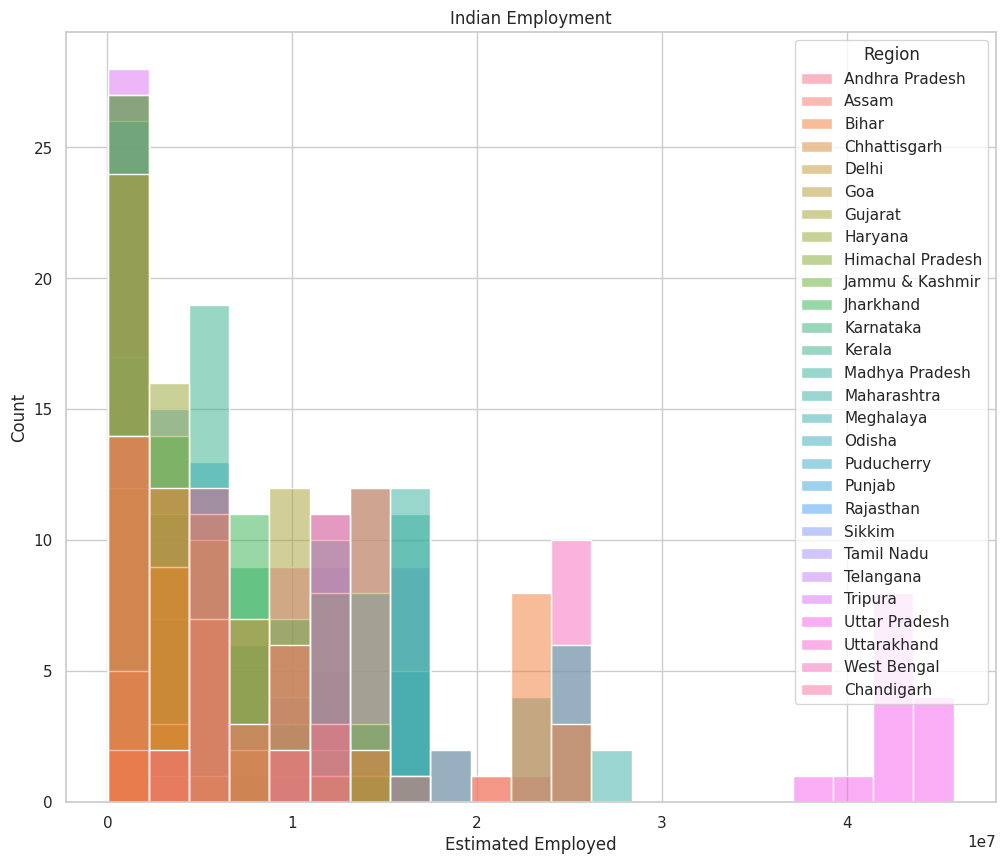

In [32]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    plt.title("Indian Employment")
    sns.histplot(x="Estimated Employed", hue="Region", data=data)
    plt.show()

In [33]:
print(data.columns)
unemployment = data.groupby(['Region', 'Area']).agg({
    'Estimated Unemployment Rate(%)': 'mean'
}).reset_index()
figure = px.sunburst(unemployment, 
                     path=['Region', 'Area'],  # Hierarchical path
                     values='Estimated Unemployment Rate(%)',
                     color='Estimated Unemployment Rate(%)',
                     color_continuous_scale='RdYlGn',
                     title='Unemployment Rate in India',
                     width=700, height=700)

figure.show()

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate(%)',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)', 'Area'],
      dtype='object')


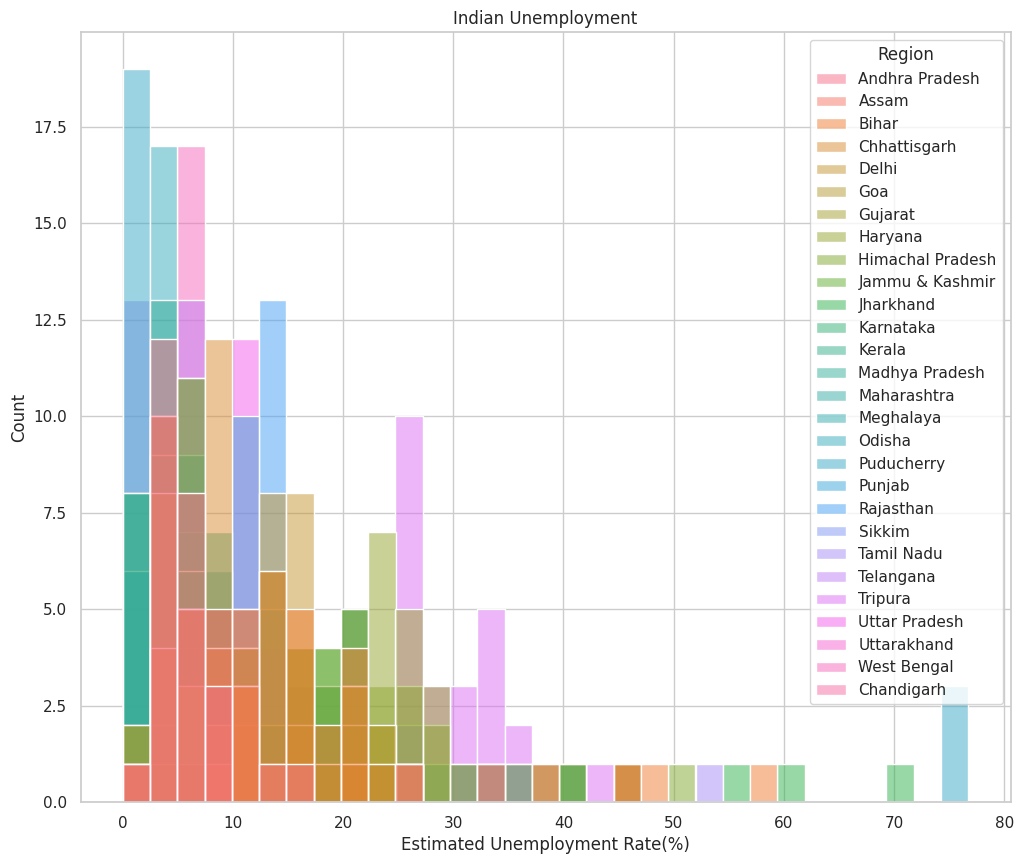

In [34]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    plt.title("Indian Unemployment")
    sns.histplot(x="Estimated Unemployment Rate(%)", hue="Region", data=data)
    plt.show()


In [35]:
data = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South'],
    'Area': ['State A', 'State B', 'State C', 'State D'],
    'Estimated Employed': [1000, 1500, 800, 1200]
})

figure = px.sunburst(data, 
                     path=['Region', 'Area'],
                     values='Estimated Employed',
                     color='Estimated Employed',
                     color_continuous_scale='RdYlGn',
                     title='Employment Distribution in India',
                     width=700, height=700)

figure.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline

In [39]:
data = pd.read_csv("/kaggle/input/analysis/Unemployment_Rate_upto_11_2020.csv")
print(data.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     

In [44]:
data.columns= ["Region","Date","Frequency",
               "Estimated Unemployment Rate(%)",
               "Estimated Employed",
               "Estimated Labour Participation Rate(%)","Region","Longitude",
               "Latitude"]

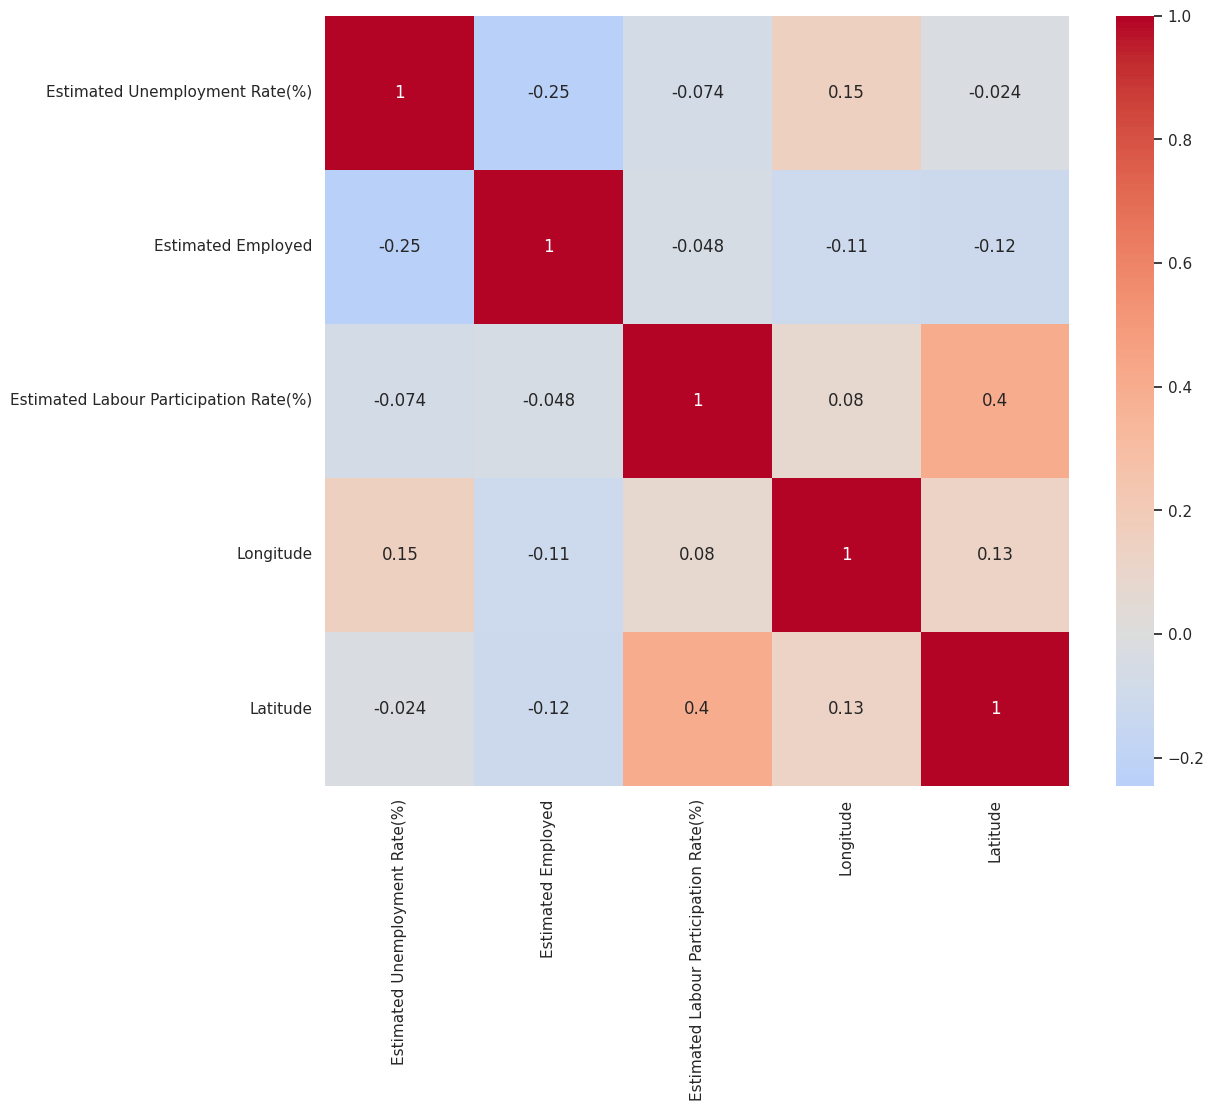

In [42]:
numeric_data = data.select_dtypes(include=['number'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

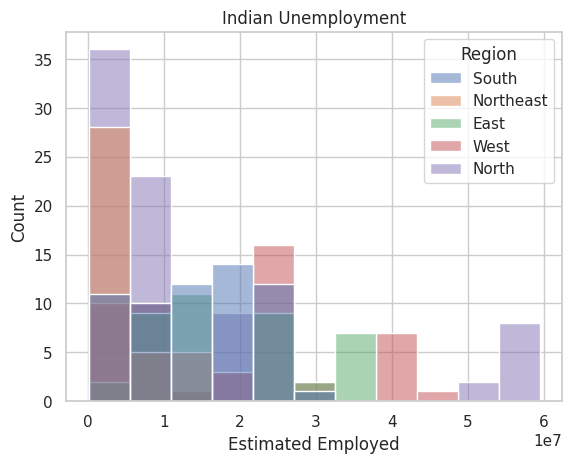

In [45]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

In [46]:
import plotly.express as px

print(data.columns)

# Grouping data by 'Region' and 'Area' to calculate mean 'Estimated Unemployment Rate(%)'
unemployment = data.groupby(['Region', 'States']).agg({'Estimated Unemployment Rate': 'mean'}).reset_index()
# Create a sunburst plot
figure = px.sunburst(
    unemployment, 
    path=['Region', 'States'],  # Hierarchical path
    values='Estimated Unemployment Rate',
    color='Estimated Unemployment Rate',
    color_continuous_scale='RdYlGn',
    title='Unemployment Rate in India',
    width=700, height=700
)
figure.show()

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')


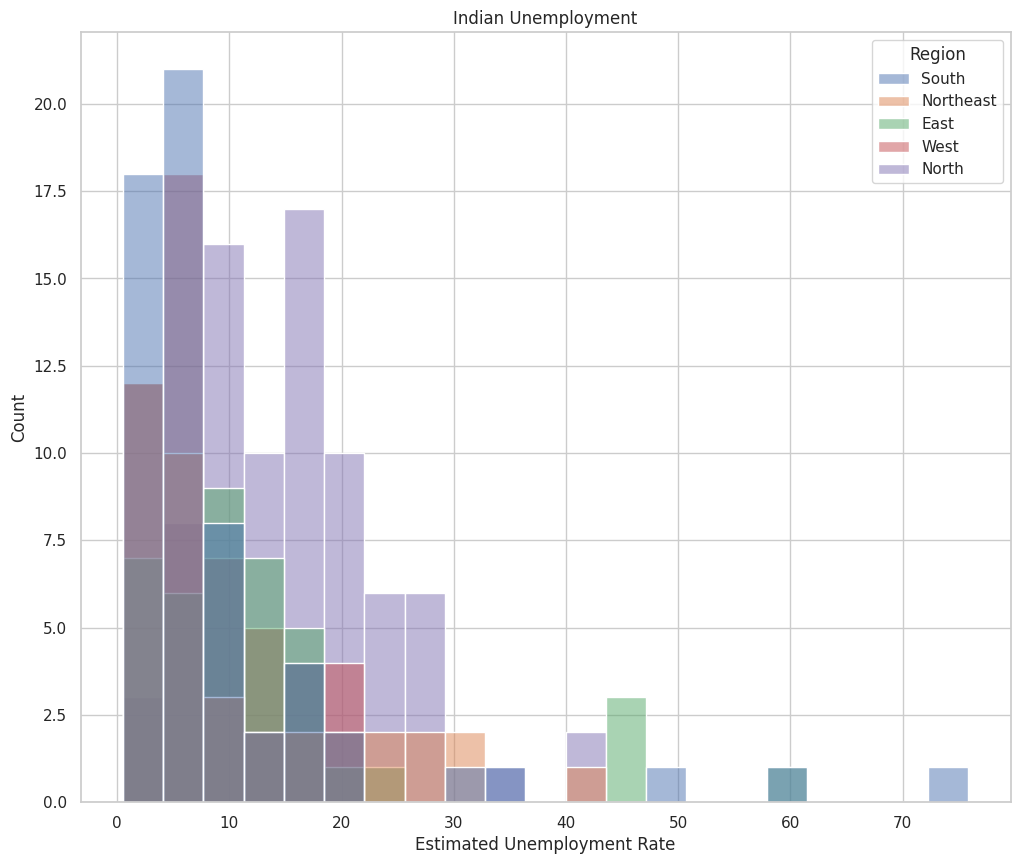

In [47]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    plt.title("Indian Unemployment")
    sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
    plt.show()

In [48]:
data = pd.DataFrame({
    'States':['Jharkhand','Meghalaya','Punjab','Tamil Nadu'],
    'Region':['East','Northeast','North','South'],
    'Estimated Employed':['11730937','13743448','14418914','13025845']
})

figure = px.sunburst(data, 
                     path=['Region', 'States'],
                     values='Estimated Employed',
                     color='Estimated Employed',
                     color_continuous_scale='RdYlGn',
                     title='Employment Distribution in India',
                     width=700, height=700)

figure.show()